# 0. IMPORT

In [68]:
import pandas as pd
import numpy as np
import math
import datetime
import json
import requests
import re
import itertools
import re
import ast
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
import collections as co

import time
from datetime import timedelta
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
%matplotlib inline


#for visualisation
%pylab inline
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
sns.set(style="white", color_codes=True)

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



Populating the interactive namespace from numpy and matplotlib


/Users/a.tolmachev/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#calc K trend line coef
def trendline(data, order=1):
    coeffs = np.polyfit(np.arange(data.shape[0]), list(data), order)
    slope = coeffs[-2]
    return round(float(slope) , 4)

# 1. LOAD AND HARD CLEAN

In [56]:
path = './data/'
expiry_p = path + 'expiry_2018.csv'
goods_p = path + 'goods.csv'
moscow_weather_p = path + 'moscow_weather.json'
payments_p = path + 'payments_2018.csv'
plan_p = path + 'plan_2018.csv'
points_p = path + 'points.csv'

In [195]:
#expiry
expiry_df = pd.read_csv(expiry_p , sep = ';' )
expiry_df.columns = ['sku' , 'date' , 'id_place' , 'id_good']

#goods
goods_df = pd.read_csv(goods_p , sep = ';' )

#payments
payments_df = pd.read_csv(payments_p  , sep = ';' , error_bad_lines = False )
payments_df.columns = ['sku' , 'id_payment' , 'date' , 'time' , 'price' , 'discount' , 'id_place' , 'id_good']
payments_df.drop(axis = 1,columns = ['id_payment'] , inplace = True)
payments_df['date'] = pd.to_datetime(payments_df['date'], format="%d.%m.%Y")


#plan
plan_df = pd.read_csv(plan_p  , sep = ';' )
plan_df.columns = ['date' , 'sku' , 'plan_cnt' , 'id_place' , 'id_good' ]


#points
points_df = pd.read_csv(points_p  , sep = ';' )


b'Skipping line 2971: expected 8 fields, saw 9\nSkipping line 4689: expected 8 fields, saw 9\nSkipping line 5063: expected 8 fields, saw 9\nSkipping line 5072: expected 8 fields, saw 9\nSkipping line 5075: expected 8 fields, saw 9\nSkipping line 5102: expected 8 fields, saw 9\nSkipping line 5111: expected 8 fields, saw 9\nSkipping line 5116: expected 8 fields, saw 9\nSkipping line 5145: expected 8 fields, saw 9\nSkipping line 5161: expected 8 fields, saw 9\nSkipping line 5190: expected 8 fields, saw 9\nSkipping line 5219: expected 8 fields, saw 9\nSkipping line 5249: expected 8 fields, saw 9\nSkipping line 5261: expected 8 fields, saw 9\nSkipping line 5280: expected 8 fields, saw 9\nSkipping line 5297: expected 8 fields, saw 9\nSkipping line 5318: expected 8 fields, saw 9\nSkipping line 5328: expected 8 fields, saw 9\nSkipping line 5334: expected 8 fields, saw 9\nSkipping line 5389: expected 8 fields, saw 9\nSkipping line 5401: expected 8 fields, saw 9\nSkipping line 5418: expected 8 f

b'Skipping line 67363: expected 8 fields, saw 9\nSkipping line 68472: expected 8 fields, saw 9\nSkipping line 68533: expected 8 fields, saw 9\nSkipping line 68543: expected 8 fields, saw 9\nSkipping line 68546: expected 8 fields, saw 9\nSkipping line 68556: expected 8 fields, saw 9\nSkipping line 68557: expected 8 fields, saw 9\nSkipping line 68596: expected 8 fields, saw 9\nSkipping line 68612: expected 8 fields, saw 9\nSkipping line 68660: expected 8 fields, saw 9\nSkipping line 68670: expected 8 fields, saw 9\nSkipping line 68688: expected 8 fields, saw 9\nSkipping line 68689: expected 8 fields, saw 9\nSkipping line 68690: expected 8 fields, saw 9\nSkipping line 68727: expected 8 fields, saw 9\nSkipping line 68734: expected 8 fields, saw 9\nSkipping line 68735: expected 8 fields, saw 9\nSkipping line 68802: expected 8 fields, saw 9\nSkipping line 68816: expected 8 fields, saw 9\nSkipping line 68817: expected 8 fields, saw 9\nSkipping line 68866: expected 8 fields, saw 9\nSkipping li

b'Skipping line 198657: expected 8 fields, saw 9\nSkipping line 198695: expected 8 fields, saw 9\nSkipping line 198729: expected 8 fields, saw 9\nSkipping line 198733: expected 8 fields, saw 9\nSkipping line 198747: expected 8 fields, saw 9\nSkipping line 198752: expected 8 fields, saw 9\nSkipping line 198753: expected 8 fields, saw 9\nSkipping line 198762: expected 8 fields, saw 9\nSkipping line 198764: expected 8 fields, saw 9\nSkipping line 198768: expected 8 fields, saw 9\nSkipping line 198769: expected 8 fields, saw 9\nSkipping line 198798: expected 8 fields, saw 9\nSkipping line 198817: expected 8 fields, saw 9\nSkipping line 198832: expected 8 fields, saw 9\nSkipping line 198836: expected 8 fields, saw 9\nSkipping line 198846: expected 8 fields, saw 9\nSkipping line 198894: expected 8 fields, saw 9\nSkipping line 198935: expected 8 fields, saw 9\nSkipping line 198985: expected 8 fields, saw 9\nSkipping line 199040: expected 8 fields, saw 9\nSkipping line 199046: expected 8 field

b'Skipping line 343204: expected 8 fields, saw 9\nSkipping line 344246: expected 8 fields, saw 9\nSkipping line 344337: expected 8 fields, saw 9\nSkipping line 344402: expected 8 fields, saw 9\nSkipping line 344407: expected 8 fields, saw 9\nSkipping line 344441: expected 8 fields, saw 9\nSkipping line 344495: expected 8 fields, saw 9\nSkipping line 344512: expected 8 fields, saw 9\nSkipping line 344525: expected 8 fields, saw 9\nSkipping line 344542: expected 8 fields, saw 9\nSkipping line 344585: expected 8 fields, saw 9\nSkipping line 344588: expected 8 fields, saw 9\nSkipping line 344590: expected 8 fields, saw 9\nSkipping line 344596: expected 8 fields, saw 9\nSkipping line 344616: expected 8 fields, saw 9\nSkipping line 344650: expected 8 fields, saw 9\nSkipping line 344696: expected 8 fields, saw 9\nSkipping line 344700: expected 8 fields, saw 9\nSkipping line 344707: expected 8 fields, saw 9\nSkipping line 344713: expected 8 fields, saw 9\nSkipping line 344723: expected 8 field

b'Skipping line 470392: expected 8 fields, saw 9\nSkipping line 471133: expected 8 fields, saw 9\nSkipping line 471134: expected 8 fields, saw 9\nSkipping line 471144: expected 8 fields, saw 9\nSkipping line 471213: expected 8 fields, saw 9\nSkipping line 471232: expected 8 fields, saw 9\nSkipping line 471239: expected 8 fields, saw 9\nSkipping line 471273: expected 8 fields, saw 9\nSkipping line 471285: expected 8 fields, saw 9\nSkipping line 471299: expected 8 fields, saw 9\nSkipping line 471316: expected 8 fields, saw 9\nSkipping line 471322: expected 8 fields, saw 9\nSkipping line 471344: expected 8 fields, saw 9\nSkipping line 471352: expected 8 fields, saw 9\nSkipping line 471403: expected 8 fields, saw 9\nSkipping line 471415: expected 8 fields, saw 9\nSkipping line 471417: expected 8 fields, saw 9\nSkipping line 471429: expected 8 fields, saw 9\nSkipping line 471457: expected 8 fields, saw 9\nSkipping line 471475: expected 8 fields, saw 9\nSkipping line 471506: expected 8 field

b'Skipping line 597034: expected 8 fields, saw 9\nSkipping line 598180: expected 8 fields, saw 9\nSkipping line 598236: expected 8 fields, saw 9\nSkipping line 598247: expected 8 fields, saw 9\nSkipping line 598260: expected 8 fields, saw 9\nSkipping line 598294: expected 8 fields, saw 9\nSkipping line 598313: expected 8 fields, saw 9\nSkipping line 598331: expected 8 fields, saw 9\nSkipping line 598366: expected 8 fields, saw 9\nSkipping line 598400: expected 8 fields, saw 9\nSkipping line 598419: expected 8 fields, saw 9\nSkipping line 598437: expected 8 fields, saw 9\nSkipping line 598471: expected 8 fields, saw 9\nSkipping line 598479: expected 8 fields, saw 9\nSkipping line 598518: expected 8 fields, saw 9\nSkipping line 598534: expected 8 fields, saw 9\nSkipping line 598552: expected 8 fields, saw 9\nSkipping line 598560: expected 8 fields, saw 9\nSkipping line 598584: expected 8 fields, saw 9\nSkipping line 598604: expected 8 fields, saw 9\nSkipping line 598610: expected 8 field

In [196]:
weather_df = pd.read_json(moscow_weather_p)
weather_df['clouds'] = [i['all'] for i in weather_df['clouds']]
weather_df['dt_iso'] = [i[:19] for i in weather_df['dt_iso']]

weather_df['temp'] = [i['temp'] for i in weather_df['main']]
weather_df['pressure'] = [i['pressure'] for i in weather_df['main']]
weather_df['humidity'] = [i['humidity'] for i in weather_df['main']]

weather_df['weather'] = [i[0]['main'] for i in weather_df['weather']]

weather_df['wind_speed'] = [i['speed'] for i in weather_df['wind']]
weather_df['wind_deg'] = [i['deg'] for i in weather_df['wind']]

weather_df['rain'] = [0 if i is np.nan else 1 for i in weather_df['rain']]
weather_df['snow'] = [0 if i is np.nan else 1 for i in weather_df['snow']]


weather_df.drop(axis = 1,columns = ['wind' , 'main'] , inplace = True)

# 2. HYPOTESES

<img src="logic_schema.png">

1. все срезы строим по дням недели
2. статистики срезов - средние, медианы, перцентили, среднеквадратичное отклонение


# 3. VISUALISATION

In [197]:
weather_df.head()

,city_id,clouds,dt,dt_iso,rain,snow,weather,temp,pressure,humidity,wind_speed,wind_deg
0,524901,90,1388534400,2014-01-01 00:00:00,0,0,Clouds,274.41,1027,74,3,230
1,524901,12,1388538000,2014-01-01 01:00:00,1,0,Clouds,274.63,1027,74,2,268
2,524901,12,1388541600,2014-01-01 02:00:00,1,0,Clouds,274.66,1027,85,1,225
3,524901,12,1388545200,2014-01-01 03:00:00,1,0,Clouds,274.53,1027,85,3,270
4,524901,12,1388548800,2014-01-01 04:00:00,1,0,Clouds,274.37,1027,85,3,270


In [198]:
payments_df.groupby(['id_place']).count().sort_values(by=['id_good'] , axis = 0 , ascending = False).head(10)

,sku,date,time,price,discount,id_good
id_place,,,,,,
71,19298,19298,19298,19298,19298,19298
57,18726,18726,18726,18726,18726,18726
67,15421,15421,15421,15421,15421,15421
21,13351,13351,13351,13351,13351,13351
86,13309,13309,13309,13309,13309,13309
19,13171,13171,13171,13171,13171,13171
43,12995,12995,12995,12995,12995,12995
39,12374,12374,12374,12374,12374,12374
61,12143,12143,12143,12143,12143,12143


In [199]:
payments_df[(payments_df.id_place == 71)].groupby(['id_good']).count().sort_values(by=['sku'] , axis = 0 , ascending = False).head()

,sku,date,time,price,discount,id_place
id_good,,,,,,
347,596,596,596,596,596,596
385,516,516,516,516,516,516
374,494,494,494,494,494,494
346,446,446,446,446,446,446
468,440,440,440,440,440,440


In [200]:
id_place = 71
id_good = 347


df_plot = payments_df[(payments_df.id_place == id_place) & (payments_df.id_good == id_good)].groupby(['date'])[['sku']].count().sort_index()

df_plot.index = pd.to_datetime(df_plot.index)

df_plot.sort_index( inplace = True )


df_plan = plan_df[(plan_df.id_place == id_place) & (plan_df.id_good == id_good)].groupby(['date'])[['plan_cnt']].sum().sort_index()
df_plan.index = pd.to_datetime(df_plan.index)
df_plan.sort_index( inplace = True )

iplot([{"x": df_plot.index, "y": df_plot['sku'] , "name" :"real revenue"}
      ,{"x": df_plan.index, "y": df_plan['plan_cnt'] , "name" :"plan revenue" }
      ])

# 3. code!


In [201]:
#по id_place в разрезе id_good в {среднем} за неделю назад, месяц назад, квартал назад
#по id_place в разрезе id_good в этот же день недели неделю назад / 2 недели / 3 недели
#div ago to prev week info
#по id_place в разрезе id_good в {среднем} за этот же день недели за месяц, квартал последний

#тренды по продажам за последний месяц, квартал


#по id_place в разрезе goods_df.category_id аналогичные 5 пункта

#по id_place в разрезе категорий сумм аналогичные 5 пункта (категория сумм с шагом в 5000)

model_df  = pd.merge(payments_df, goods_df[['sku','category_id']], on='sku')
model_df.head()

,sku,date,time,price,discount,id_place,id_good,category_id
0,1000438,2018-08-31,10:34,7000,0,43,346,11.0
1,1000438,2018-10-04,11:14,7000,0,35,346,11.0
2,1000438,2018-10-04,11:23,7000,0,57,346,11.0
3,1000438,2018-10-04,12:29,7000,0,110,346,11.0
4,1000438,2018-10-04,12:32,7000,0,55,346,11.0


In [202]:
pay_aggr_df = None
pay_aggr_df = model_df.drop(['sku' , 'time' ,'price' ] , axis = 1)[:]

pay_aggr_df = pay_aggr_df.groupby(['date' , 'id_place','id_good' , 'category_id'])[['discount']].count().reset_index()[:]
pay_aggr_df.columns = ['date' , 'id_place','id_good' ,'category_id','count']


In [203]:
pay_aggr_df['count'] = np.log2(pay_aggr_df['count'] + 1)

In [204]:
pay_aggr_df['weekday'] = pay_aggr_df['date'].dt.weekday

In [205]:
pay_aggr_df.head()

,date,id_place,id_good,category_id,count,weekday
0,2018-04-19,32,346,11.0,1.584963,3
1,2018-04-19,32,347,11.0,1.584963,3
2,2018-04-19,32,349,11.0,1.584963,3
3,2018-04-19,32,358,3.0,1.000000,3
4,2018-04-19,32,359,3.0,1.000000,3


In [206]:
#add prev days info 
want_days_back = 30

prev_columns = []
pct_change_columns = []
pct_rename = {}

for d in range(want_days_back):
    time.sleep(0.1)
    pay_aggr_df['date_prev'] = pay_aggr_df['date'] - datetime.timedelta(days=d+1)
    
    pay_aggr_df = pd.merge(

                            pay_aggr_df
                            ,pay_aggr_df[['date' , 'id_place' , 'id_good' , 'count']]
                         , how='left'
                         ,left_on = ['date_prev' , 'id_place' , 'id_good']
                         ,right_on = ['date' , 'id_place' , 'id_good']
                         #, left_index=True
                         #, right_index=True
                         ).drop(['date_y'] , axis = 1).rename(columns={'date_x':'date'
                                                                       ,'count_x':'count'
                                                                      ,'count_y':'count_prev_'+str(d+1)})
    
    prev_columns.append('count_prev_'+str(d+1))
    pct_change_columns.append('pct_change_'+str(d+1))
    pct_rename['count_prev_'+str(d+1)] = 'pct_change_'+str(d+1)
    
pay_aggr_df.fillna(0 , inplace = True)

print('done')

done


In [207]:
#add stats info
add_stats_columns = []


if want_days_back >= 7:
    add_feat_step = 'w'
    prev_cols = prev_columns[:7]
    
    pay_aggr_df[add_feat_step + '_miss'] = (pay_aggr_df[prev_cols] == 0).sum(axis = 1)
    pay_aggr_df[add_feat_step + '_cnt'] = pay_aggr_df[prev_cols].sum(axis = 1)
    pay_aggr_df[add_feat_step + '_mean'] = pay_aggr_df[prev_cols].mean(axis = 1)
    pay_aggr_df[add_feat_step + '_min'] = pay_aggr_df[prev_cols].min(axis = 1)
    pay_aggr_df[add_feat_step + '_max'] = pay_aggr_df[prev_cols].max(axis = 1)
    add_stats_columns.extend([add_feat_step + '_miss' , add_feat_step + '_cnt' , add_feat_step + '_mean'
                             ,add_feat_step + '_min' , add_feat_step + '_max'])
    
    
if want_days_back >= 30:
    add_feat_step = 'm'
    prev_cols = prev_columns[:30]
    
    pay_aggr_df[add_feat_step + '_miss'] = (pay_aggr_df[prev_cols] == 0).sum(axis = 1)
    pay_aggr_df[add_feat_step + '_cnt'] = pay_aggr_df[prev_cols].sum(axis = 1)
    pay_aggr_df[add_feat_step + '_mean'] = pay_aggr_df[prev_cols].mean(axis = 1)
    pay_aggr_df[add_feat_step + '_min'] = pay_aggr_df[prev_cols].min(axis = 1)
    pay_aggr_df[add_feat_step + '_max'] = pay_aggr_df[prev_cols].max(axis = 1)   
    
    pay_aggr_df[add_feat_step + '_25perc'] = np.percentile(pay_aggr_df[prev_cols] , 25 , axis = 1)
    pay_aggr_df[add_feat_step + '_75perc'] = np.percentile(pay_aggr_df[prev_cols] , 25 , axis = 1)
    pay_aggr_df[add_feat_step + '_std'] = np.std(pay_aggr_df[prev_cols]  , axis = 1)
    add_stats_columns.extend([add_feat_step + '_miss' , add_feat_step + '_cnt' , add_feat_step + '_mean'
                             ,add_feat_step + '_min' , add_feat_step + '_max'
                             ,add_feat_step + '_25perc',add_feat_step + '_75perc',add_feat_step + '_std'])
    
    
if want_days_back >= 90:
    add_feat_step = 'q'
    prev_cols = prev_columns[:30]
    
    pay_aggr_df[add_feat_step + '_miss'] = (pay_aggr_df[prev_cols] == 0).sum(axis = 1)
    pay_aggr_df[add_feat_step + '_cnt'] = pay_aggr_df[prev_cols].sum(axis = 1)
    pay_aggr_df[add_feat_step + '_mean'] = pay_aggr_df[prev_cols].mean(axis = 1)
    pay_aggr_df[add_feat_step + '_min'] = pay_aggr_df[prev_cols].min(axis = 1)
    pay_aggr_df[add_feat_step + '_max'] = pay_aggr_df[prev_cols].max(axis = 1)   
    
    pay_aggr_df[add_feat_step + '_25perc'] = np.percentile(pay_aggr_df[prev_cols] , 25 , axis = 1)
    pay_aggr_df[add_feat_step + '_75perc'] = np.percentile(pay_aggr_df[prev_cols] , 25 , axis = 1)
    pay_aggr_df[add_feat_step + '_std'] = np.std(pay_aggr_df[prev_cols]  , axis = 1)
    add_stats_columns.extend([add_feat_step + '_miss' , add_feat_step + '_cnt' , add_feat_step + '_mean'
                             ,add_feat_step + '_min' , add_feat_step + '_max'
                             ,add_feat_step + '_25perc',add_feat_step + '_75perc',add_feat_step + '_std'])
    
    
print('done')

done


In [208]:
#add not main features
pay_aggr_df = pd.merge(pay_aggr_df
                       ,pay_aggr_df[prev_cols].pct_change(periods=1,axis=1, fill_method='ffill').rename(columns=pct_rename)[pct_change_columns[1:]]
                      ,left_index = True
                       ,right_index = True
                      )
print('done')

done


In [209]:
#clear nulls 
pay_aggr_df.replace([np.inf, -np.inf], np.nan , inplace = True)
pay_aggr_df.fillna(0 , inplace = True)

print('done')

done


In [210]:
pay_aggr_df.to_csv('payments_aggr_info.csv' , index= False )

In [19]:
#pay_aggr_df = pd.read_csv('payments_aggr_info.csv')

In [211]:
pay_aggr_df.head()

,date,id_place,id_good,category_id,count,weekday,date_prev,count_prev_1,count_prev_2,count_prev_3,...,pct_change_21,pct_change_22,pct_change_23,pct_change_24,pct_change_25,pct_change_26,pct_change_27,pct_change_28,pct_change_29,pct_change_30
0,2018-04-19,32,346,11.0,1.584963,3,2018-03-20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-19,32,347,11.0,1.584963,3,2018-03-20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-19,32,349,11.0,1.584963,3,2018-03-20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-19,32,358,3.0,1.000000,3,2018-03-20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-19,32,359,3.0,1.000000,3,2018-03-20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
dfDummies = pd.get_dummies(pay_aggr_df['id_place'], prefix = 'id_place')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['id_good'], prefix = 'id_good')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['category_id'], prefix = 'category_id')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)
dfDummies = pd.get_dummies(pay_aggr_df['weekday'], prefix = 'weekday')
pay_aggr_df = pd.concat([pay_aggr_df, dfDummies], axis=1)


In [213]:
drop_columns = ['date' , 'id_place' , 'category_id' ,'id_good' , 'weekday' , 'date_prev']
pay_aggr_df.drop(drop_columns , axis = 1 , inplace = True)

In [214]:
from hyperopt import fmin, hp, tpe, STATUS_OK, Trials
import lightgbm as lgb


In [215]:
interest_columns = list(set(list(pay_aggr_df.columns)) - set(['count']))
target_col = 'count'

In [185]:
#%%time
X_train = pay_aggr_df[interest_columns].loc[:250000][:]
X_test = pay_aggr_df[interest_columns].loc[250000:][:]
y_train = pay_aggr_df[target_col].loc[:250000][:]
y_test = pay_aggr_df[target_col].loc[250000:][:]

#X_train, X_test, y_train, y_test = train_test_split(pay_aggr_df[interest_columns][:], pay_aggr_df[target_col][:]) 

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test)

lgb_tt = lgb.Dataset(pay_aggr_df[interest_columns][:], pay_aggr_df[target_col][:])


def objective(params):

    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
        'boosting_type': str(params['boosting_type']),
        'objective': str(params['objective']),
        'max_depth': int(params['max_depth']),
        'bagging_freq': int(params['bagging_freq']),
        'bagging_fraction': '{:.3f}'.format(params['bagging_fraction']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),
    }
    
    cv_results = lgb.cv(
            params,
            lgb_tt,
            num_boost_round=500,
            nfold=4,
            metrics={'mae','mse','l2'},
            early_stopping_rounds=10,
            # This is what I added
            stratified=False
            )
    
    n_boost_best = len(cv_results['l1-mean'])
    mae = np.min(cv_results['l1-mean'])
    



    print("mae {:.3f} params {} n_boost {}".format(mae, params,n_boost_best))
    
    return{'loss':mae, 'status': STATUS_OK }

space ={    
        #lgbm
        #'boosting_type': hp.choice('boosting_type','gbdt'),
        #'objective': hp.choice('objective','regression'),
        #'max_depth' : hp.choice('max_depth',5),
        #'metric': hp.choice('metric',{'l2', 'l1','mae'}),
        #'num_leaves': hp.choice('num_leaves',31),
        #'learning_rate': hp.choice('learning_rate',0.05),
        #'feature_fraction': hp.choice('feature_fraction',0.9),
        #'bagging_fraction': hp.choice('bagging_fraction',0.8),
        #'bagging_freq': hp.choice('bagging_freq',5),
        #'verbose': hp.choice('verbose',1)

    
        #xgb
        #'max_depth': hp.choice('max_depth', np.arange(10, 30, dtype=int)),
        #'min_child_weight': hp.quniform ('min_child', 1, 20, 1),
        #'subsample': hp.uniform ('subsample', 0.8, 1),
        #'n_estimators' : hp.choice('n_estimators', np.arange(1000, 10000, 100, dtype=int)),
        #'learning_rate' : hp.quniform('learning_rate', 0.025, 0.5, 0.025),
        #'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
        #'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05)
    }

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 64, 8),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'boosting_type' : hp.choice('boosting_type' , ['gbdt' , 'rf']),
    'objective': hp.choice('objective' , ['regression','huber','poisson']),
    'max_depth': hp.quniform('max_depth', 6, 18, 2),
    'bagging_freq': hp.quniform('bagging_freq', 6, 18, 2),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1.0),
    'feature_fraction': hp.uniform('feature_fraction', 0.5, 1.0),                 
   }

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print('\n!!!!! and the winner is:')
print(best)

mae 0.290 params {'num_leaves': 32, 'colsample_bytree': '0.573', 'boosting_type': 'gbdt', 'objective': 'regression', 'max_depth': 16, 'bagging_freq': 16, 'bagging_fraction': '0.736', 'feature_fraction': '0.518'} n_boost 500
mae 0.351 params {'num_leaves': 32, 'colsample_bytree': '0.637', 'boosting_type': 'rf', 'objective': 'poisson', 'max_depth': 18, 'bagging_freq': 8, 'bagging_fraction': '0.714', 'feature_fraction': '0.922'} n_boost 10
mae 0.319 params {'num_leaves': 32, 'colsample_bytree': '0.613', 'boosting_type': 'rf', 'objective': 'regression', 'max_depth': 16, 'bagging_freq': 12, 'bagging_fraction': '0.552', 'feature_fraction': '0.914'} n_boost 17
mae 0.289 params {'num_leaves': 48, 'colsample_bytree': '0.679', 'boosting_type': 'gbdt', 'objective': 'huber', 'max_depth': 14, 'bagging_freq': 14, 'bagging_fraction': '0.946', 'feature_fraction': '0.620'} n_boost 480
mae 0.351 params {'num_leaves': 64, 'colsample_bytree': '0.946', 'boosting_type': 'rf', 'objective': 'poisson', 'max_de

In [216]:
best

{'bagging_fraction': 0.9455721266302124,
 'bagging_freq': 14,
 'boosting_type': 'gbdt',
 'colsample_bytree': 0.678547801189827,
 'feature_fraction': 0.6204114599267507,
 'max_depth': 14,
 'num_leaves': 48,
 'objective': 'regression',
 'metric': {'l2', 'mse'}}

In [217]:
#new
#best['boosting_type'] = ['gbdt' , 'rf'][best['boosting_type']]
params = best
#params['class_weight'] = 'is_unbalance'
#params['objective'] = 'binary'
#params['metric'] = 'auc'
#params['random_state'] = 4242442

params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = {'l2','mse'}


for i in params:
    if type(params[i]) != str and type(params[i]) != set:
        if int(params[i]) == params[i]:
            params[i] = int(params[i])

In [218]:
n_boost_optimal = 500
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=n_boost_optimal + 20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5
               )

[1]	valid_0's l2: 0.246409	valid_0's l2: 0.246409
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.230907	valid_0's l2: 0.230907
[3]	valid_0's l2: 0.219709	valid_0's l2: 0.219709
[4]	valid_0's l2: 0.209328	valid_0's l2: 0.209328
[5]	valid_0's l2: 0.200466	valid_0's l2: 0.200466
[6]	valid_0's l2: 0.192715	valid_0's l2: 0.192715
[7]	valid_0's l2: 0.186327	valid_0's l2: 0.186327
[8]	valid_0's l2: 0.181814	valid_0's l2: 0.181814
[9]	valid_0's l2: 0.178002	valid_0's l2: 0.178002
[10]	valid_0's l2: 0.174356	valid_0's l2: 0.174356
[11]	valid_0's l2: 0.170964	valid_0's l2: 0.170964
[12]	valid_0's l2: 0.168165	valid_0's l2: 0.168165
[13]	valid_0's l2: 0.165855	valid_0's l2: 0.165855
[14]	valid_0's l2: 0.163686	valid_0's l2: 0.163686
[15]	valid_0's l2: 0.161995	valid_0's l2: 0.161995
[16]	valid_0's l2: 0.160612	valid_0's l2: 0.160612
[17]	valid_0's l2: 0.159126	valid_0's l2: 0.159126
[18]	valid_0's l2: 0.157973	valid_0's l2: 0.157973
[19]	valid_0's l2: 0.156925	va

In [219]:
model = lgb.train(params, lgb_train, num_boost_round = 100  )

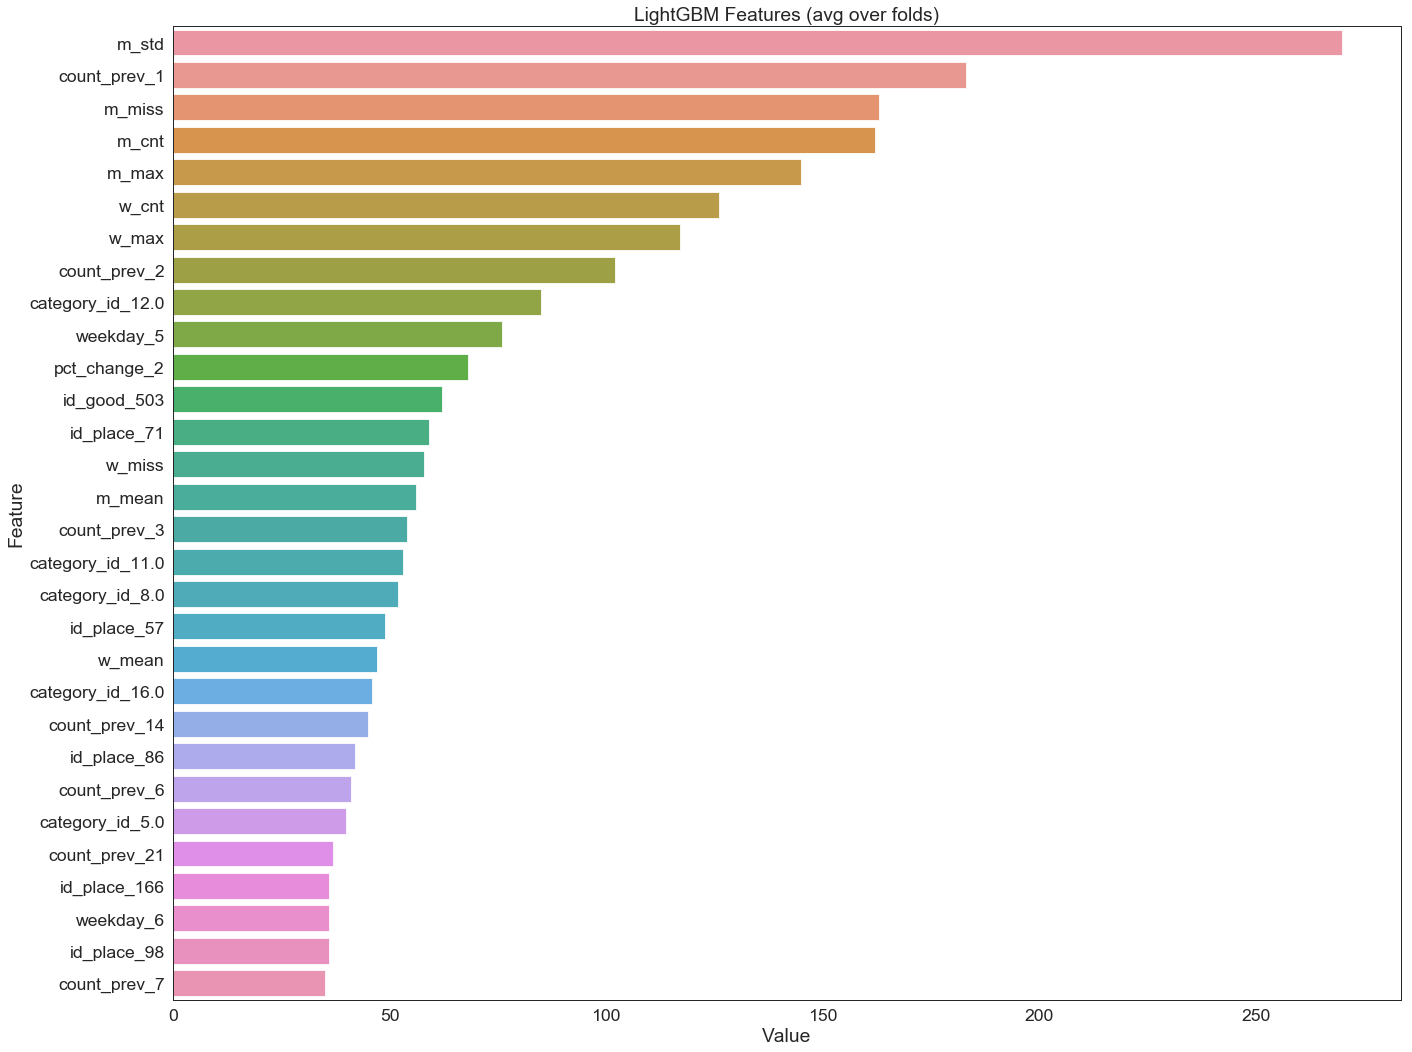

In [220]:
first = 30

sns.set_context("paper", font_scale=2)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),model.feature_name())), columns=['Value','Feature'])


#feature_imp = feature_imp[~(feature_imp.Feature.isin(['dev_max_turnover']))][:]

#feature_imp = feature_imp[int_columns][:]

feature_imp = feature_imp.tail(first)[:]

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

In [221]:
cnt_predict = model.predict(X_test[interest_columns][:])

pred
real


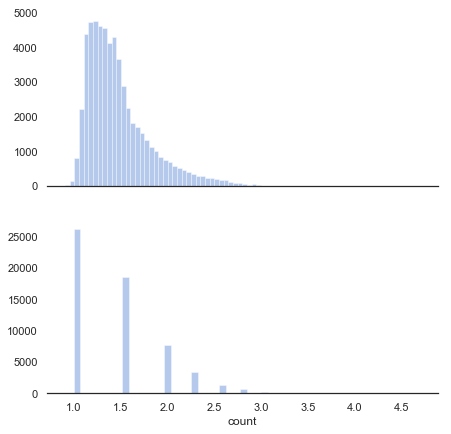

In [222]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
print('pred')
sns.distplot(cnt_predict, kde=False, color="b", ax=axes[0])

# Plot a simple histogram with binsize determined automatically
print('real')
sns.distplot(y_test, kde=False, color="b", ax=axes[1])


In [223]:
pay_aggr_df = pd.read_csv('payments_aggr_info.csv')



In [224]:
pay_aggr_df['pred'] = np.nan
pay_aggr_df.loc[250000: , 'pred'] = np.round(2 ** cnt_predict)
pay_aggr_df.loc[250000: , 'count'] = 2 ** pay_aggr_df.loc[250000: ]['count']

pay_aggr_df_test = pay_aggr_df.loc[250000:][:]

In [225]:

pay_aggr_df_test.groupby(['id_place']).count().sort_values(by=['date'] , ascending = False).head(8)

,date,id_good,category_id,count,weekday,date_prev,count_prev_1,count_prev_2,count_prev_3,count_prev_4,...,pct_change_22,pct_change_23,pct_change_24,pct_change_25,pct_change_26,pct_change_27,pct_change_28,pct_change_29,pct_change_30,pred
id_place,,,,,,,,,,,,,,,,,,,,,
163,830,830,830,830,830,830,830,830,830,830,...,830,830,830,830,830,830,830,830,830,830
213,813,813,813,813,813,813,813,813,813,813,...,813,813,813,813,813,813,813,813,813,813
166,729,729,729,729,729,729,729,729,729,729,...,729,729,729,729,729,729,729,729,729,729
238,716,716,716,716,716,716,716,716,716,716,...,716,716,716,716,716,716,716,716,716,716
229,712,712,712,712,712,712,712,712,712,712,...,712,712,712,712,712,712,712,712,712,712
119,700,700,700,700,700,700,700,700,700,700,...,700,700,700,700,700,700,700,700,700,700
161,697,697,697,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
71,682,682,682,682,682,682,682,682,682,682,...,682,682,682,682,682,682,682,682,682,682


In [228]:
pay_aggr_df_test[(pay_aggr_df_test.id_place == 163)].groupby(['category_id']).count().sort_values(by = ['date'] , ascending = False).head(9)


,date,id_place,id_good,count,weekday,date_prev,count_prev_1,count_prev_2,count_prev_3,count_prev_4,...,pct_change_22,pct_change_23,pct_change_24,pct_change_25,pct_change_26,pct_change_27,pct_change_28,pct_change_29,pct_change_30,pred
category_id,,,,,,,,,,,,,,,,,,,,,
2.0,111,111,111,111,111,111,111,111,111,111,...,111,111,111,111,111,111,111,111,111,111
3.0,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
7.0,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
8.0,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
4.0,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
6.0,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
1.0,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
10.0,54,54,54,54,54,54,54,54,54,54,...,54,54,54,54,54,54,54,54,54,54
9.0,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


In [231]:
id_place = 163
id_good = 473
category_id = 3


df_plot = pay_aggr_df_test[(pay_aggr_df_test.id_place == id_place) 
                           #& (pay_aggr_df_test.id_good == id_good)
                           & (pay_aggr_df_test.category_id == category_id)
                          ].groupby(['date'])[['pred' , 'count' ]].sum().sort_index()

df_plot.index = pd.to_datetime(df_plot.index)

df_plot.sort_index( inplace = True )


df_plan = plan_df[(plan_df.id_place == id_place) 
                  & (plan_df.id_good == id_good)].groupby(['date'])[['plan_cnt']].sum().sort_index()
df_plan.index = pd.to_datetime(df_plan.index)
df_plan.sort_index( inplace = True )
df_plan = df_plan.loc[df_plot.index][:]



iplot([{"x": df_plot.index, "y": df_plot['count'] , "name" :"real count"}
       ,{"x": df_plot.index, "y": df_plot['pred'] , "name" :"pred count" }
      ,{"x": df_plan.index, "y": df_plan['plan_cnt'] , "name" :"plan count" }
       
      ])



#calc metrics
df_plan['pred'] = df_plot['pred']
df_plan['count'] = df_plot['count']

df_plan.dropna(inplace = True)

real_val = df_plan['count'].sum()
pred_val = df_plan['pred'].sum()
plan_val = df_plan['plan_cnt'].sum()

print(plan_val / real_val , 'plan acc')
print(pred_val / real_val , 'pred acc')

0.18161925601750548 plan acc
0.8358862144420132 pred acc
